# Figure 5.
| Author  | Stanley A. Baronett  |
|---------|----------------------|
| Created |  08/22/2025          |
| Updated |  08/22/2025          |

The axisymmetric protoplanetary disk model.
In this meridional projection, radius $r$ is in astronomical units (au), and disk latitudes are in degrees with the midplane at $0\degree$ and the poles at $\pm90\degree$.
The left half shows the time-independent (Sections 3.3) dust density $\rho$ [equation (15)] and the right the effective depth to peak stellar irradiation $\tau_*$ [equation (19)].

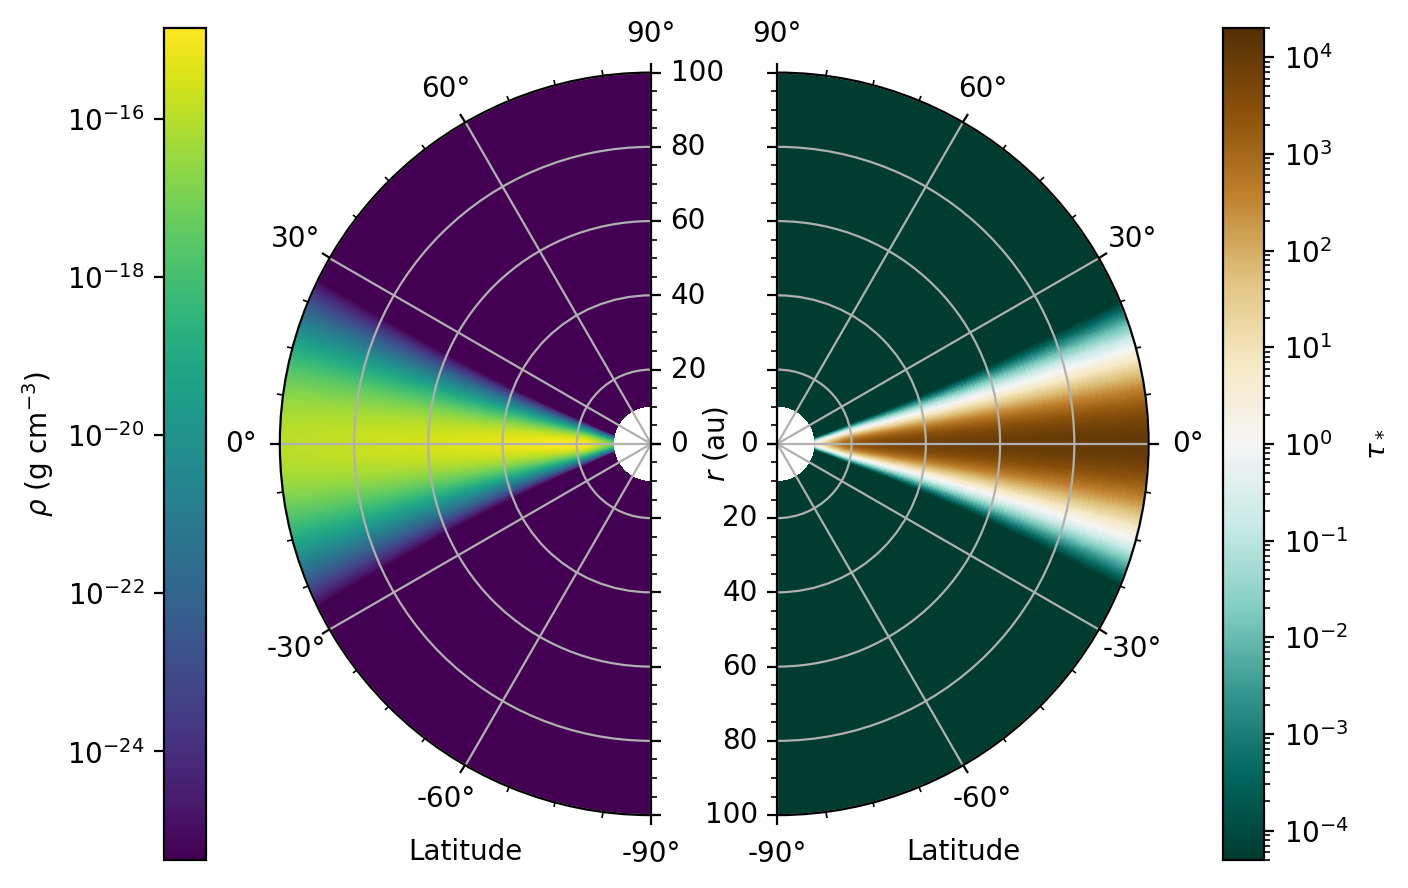

In [1]:
#===============================================================================
import athena_read
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
import numpy as np

# Constants
au = 1.495978707e13 # astronomical unit [cm]

# Read and plot
fig, axs = plt.subplots(ncols=2, figsize=(8, 6), dpi=200,
                        subplot_kw=dict(projection='polar'))
problem_id = 'dsharp'
root = '../athena/models/dsharp_abs-sca'
path = f'{root}/nfreq/64'
athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
density_unit = athinput['radiation']['density_unit']
length_unit = athinput['radiation']['length_unit']
l_au = length_unit/au
athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.00001.athdf')

# Density
im0 = axs[0].pcolormesh(np.pi/2-athdf['x2f'], athdf['x1f']*l_au,
                        athdf['rho'][0].transpose()*density_unit,
                        cmap='viridis', norm=colors.LogNorm())

# Optical depth
f_star = 54
try:
    dtau = (athdf[f'Sigma_a_{f_star}'][0] + athdf[f'Sigma_s_{f_star}'][0])\
           *np.diff(athdf['x1f'])
except KeyError:
    dtau = athdf['Sigma_a_0'][0]*np.diff(athdf['x1f'])
tau_field = np.cumsum(dtau, axis=1)
im1 = axs[1].pcolormesh(np.pi/2-athdf['x2f'], athdf['x1f']*l_au,
                        tau_field.transpose(), cmap='BrBG_r',
                        norm=colors.LogNorm(vmin=5e-5, vmax=2e4))

# Color bars
cbar0 = plt.colorbar(im0, label=r'$\rho$ (g cm$^{-3}$)', location='left',
                     pad=-0.15, shrink=0.9)
cbar1 = plt.colorbar(im1, label=r'$\tau_*$', location='right', pad=-0.15,
                     shrink=0.9)

# Format plots
for i, ax in enumerate(axs):
    ax.minorticks_on()
    ax.set_xlabel(r'Latitude', loc='center', labelpad=-11)
    ax.tick_params(axis='both', which='both', top=True, left=True, right=True)
axs[0].set_theta_zero_location('W')
axs[0].set_theta_direction(-1)
axs[0].set_thetamin(90)
axs[0].set_thetamax(-90)
axs[1].set_thetamin(-90)
axs[1].set_thetamax(90)
axs[1].set_ylabel(r'$r$ (au)', labelpad=-50)
plt.subplots_adjust(wspace=-0.33)
plt.savefig('figs/disk.png', dpi=600,
            bbox_inches=Bbox([[0.65, 0.87],    #[[xmin, ymin],
                              [7.55, 5.09]]))  # [xmax, ymax]]
#===============================================================================